# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('./input/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc_1.head()

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste


In [4]:
sinasc_2 = sinasc_raw[['ESCMAE', 'PESO', 'DTNASC', 'SEXO' ]]
sinasc_2.head()

,ESCMAE,PESO,DTNASC,SEXO
0,8 a 11 anos,3685,2019-02-19,Masculino
1,8 a 11 anos,3055,2019-02-21,Feminino
2,8 a 11 anos,3460,2019-02-25,Feminino
3,12 anos ou mais,2982,2019-03-20,Feminino
4,8 a 11 anos,3310,2019-03-23,Feminino


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [5]:
idade_media_mae_pai_municipio = sinasc_1.groupby('munResNome').mean()
idade_media_mae_pai_municipio

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [6]:
sinasc_2.dtypes

ESCMAE    object
PESO       int64
DTNASC    object
SEXO      object
dtype: object

In [7]:
sinasc_2.loc[sinasc_2['DTNASC'] == '2019-06-28'].groupby('ESCMAE')['PESO'].count().to_frame()

,PESO
ESCMAE,
1 a 3 anos,1
12 anos ou mais,10
4 a 7 anos,16
8 a 11 anos,55


In [8]:
sinasc_2.loc[sinasc_2['DTNASC'] == '2019-06-28'].groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack()
#sinasc_2.loc[sinasc_2['DTNASC'] == '2019-06-28']

SEXO,Feminino,Masculino
ESCMAE,,
1 a 3 anos,NaN,3462.000000
12 anos ou mais,3081.000000,3280.800000
4 a 7 anos,3307.125000,3293.375000
8 a 11 anos,3158.076923,3205.241379


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

O munícipio de menor número de nascimentos foi o de Castanheiras. Segue abaixo os dados referentes a idade dos pais:

- Idade Mínima -- 
Mãe: 17 -- 
Pai: 17 

- Idade Média -- 
Mãe: 27 -- 
Pai: 31 

- Idade Máxima --
Mãe: 39 -- 
Pai: 43 

In [9]:
sinasc_1.groupby('munResNome')['IDADEMAE'].count().sort_values()

munResNome
Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Primavera de Rondônia          43
Parecis                        44
Rio Crespo                     50
São Felipe D'Oeste             54
Teixeirópolis                  64
Cacaulândia                    75
Cabixi                         80
Vale do Paraíso                81
Ministro Andreazza             84
Vale do Anari                  93
Theobroma                      97
Novo Horizonte do Oeste        98
Santa Luzia D'Oeste            99
Nova União                    104
Itapuã do Oeste               109
Governador Jorge Teixeira     112
Corumbiara                    127
Alto Alegre dos Parecis       154
Chupinguaia                   162
Mirante da Serra              164
Campo Novo de Rondônia        166
Seringueiras                  168
Urupá                         170
Monte Negro                   199
Cujubim                       205
Alvorada D'Oeste              205
Col

In [10]:
sinasc_1[sinasc_1['munResNome'] == 'Castanheiras'].groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].agg([('Mínima', 'min'),('Média',np.median), ('Máxima' , 'max')])

C:\Users\hfasa\AppData\Local\Temp\ipykernel_1612\2406610274.py:1: FutureWarning: The provided callable <function median at 0x000001E6E1933420> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sinasc_1[sinasc_1['munResNome'] == 'Castanheiras'].groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].agg([('Mínima', 'min'),('Média',np.median), ('Máxima' , 'max')])


IDADEMAE              IDADEPAI             
               Mínima Média Máxima   Mínima Média Máxima
munResNome                                              
Castanheiras       17  27.0     39     17.0  31.5   43.0

In [11]:
sinasc_raw[sinasc_raw['munResNome'] == 'Município ignorado - RO' ].value_counts().to_frame()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,


In [12]:
sinasc_1[sinasc_1['munResNome'] == 'Município ignorado - RO' ].value_counts().to_frame()


,,,count
IDADEMAE,IDADEPAI,munResNome,
24,22.0,Município ignorado - RO,1


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



O munícipio de maior número de nascimentos foi o de Porto Velho. Segue abaixo os dados referentes a idade dos pais:

- Idade Mínima -- 
Mãe: 12 -- 
Pai: 16 

- Idade Média -- 
Mãe: 26 -- 
Pai: 32 

- Idade Máxima --
Mãe: 47 -- 
Pai: 65 

In [13]:
sinasc_1.groupby('munResNome')['IDADEMAE'].count().sort_values(ascending=False)

munResNome
Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Cam

In [14]:
sinasc_1[sinasc_1['munResNome'] == 'Porto Velho'].groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].agg([('Mínima', 'min'),('Média',np.median), ('Máxima' , 'max')])

C:\Users\hfasa\AppData\Local\Temp\ipykernel_1612\939794609.py:1: FutureWarning: The provided callable <function median at 0x000001E6E1933420> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sinasc_1[sinasc_1['munResNome'] == 'Porto Velho'].groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].agg([('Mínima', 'min'),('Média',np.median), ('Máxima' , 'max')])


IDADEMAE              IDADEPAI             
              Mínima Média Máxima   Mínima Média Máxima
munResNome                                             
Porto Velho       12  26.0     47     16.0  32.0   65.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

In [15]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [16]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [17]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

### Plotagem de gráficos

In [18]:
sinasc_raw.loc[:,'DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [19]:
sinasc_raw['DTNASC'].head(n=5)

0    2019-02-19 00:00:00
1    2019-02-21 00:00:00
2    2019-02-25 00:00:00
3    2019-03-20 00:00:00
4    2019-03-23 00:00:00
Name: DTNASC, dtype: object

In [20]:
sinasc_raw['PARTO'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Cesáreo
1        Cesáreo
2        Cesáreo
3        Cesáreo
4        Cesáreo
          ...   
27023    Cesáreo
27024    Vaginal
27025    Cesáreo
27026    Vaginal
27027    Cesáreo
Name: PARTO, Length: 27028, dtype: object>

<Axes: xlabel='GESTACAO'>

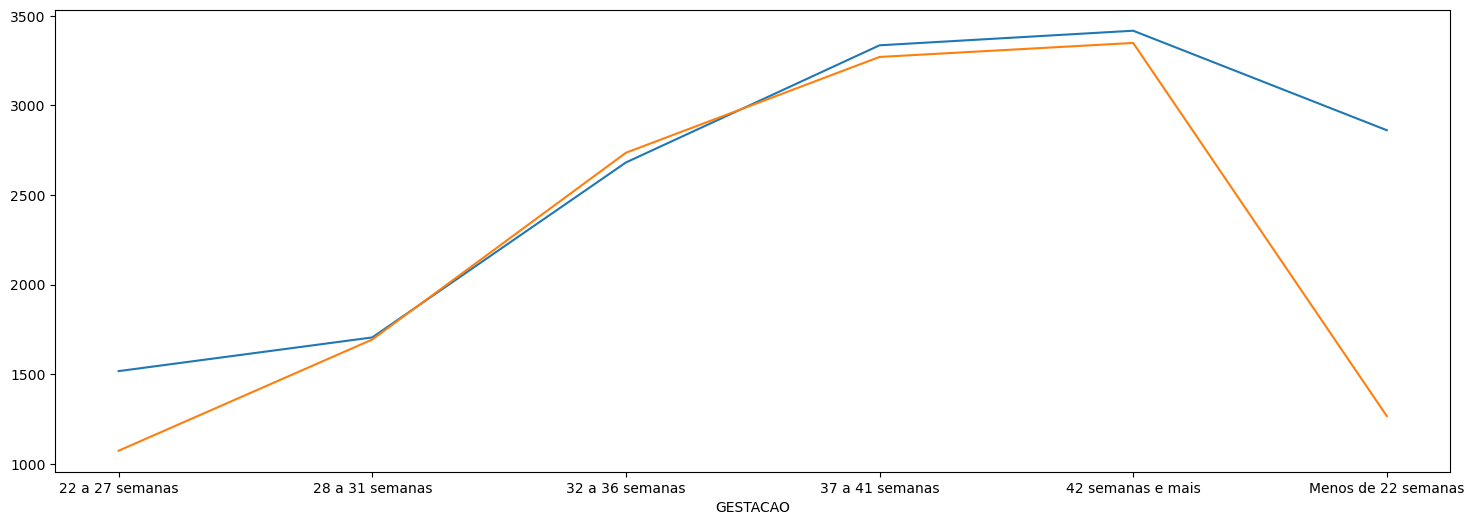

In [21]:
parto_cesarea = sinasc_raw.loc[sinasc_raw['PARTO'] == 'Cesáreo'].groupby('GESTACAO')['PESO'].mean()
parto_normal = sinasc_raw.loc[sinasc_raw['PARTO'] == 'Vaginal'].groupby('GESTACAO')['PESO'].mean()

parto_cesarea.plot(figsize=[18,6])
parto_normal.plot()

<Axes: xlabel='GESTACAO'>

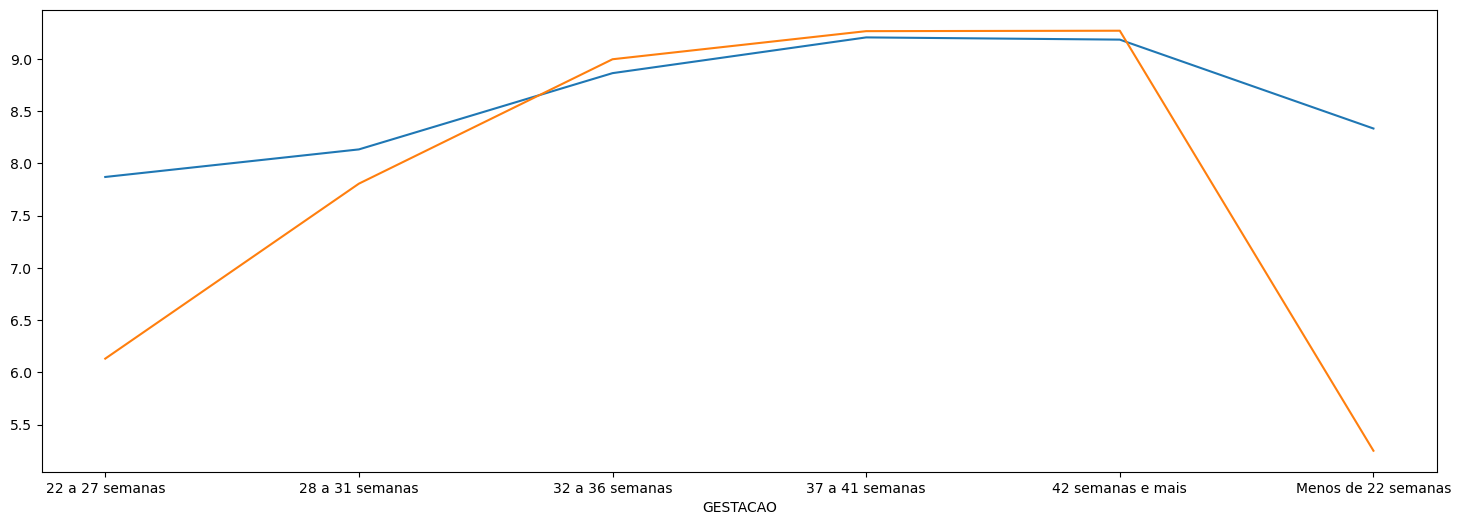

In [22]:
parto_cesarea_apgar5 = sinasc_raw.loc[sinasc_raw['PARTO'] == 'Cesáreo'].groupby('GESTACAO')['APGAR5'].mean()
parto_normal_apgar5 = sinasc_raw.loc[sinasc_raw['PARTO'] == 'Vaginal'].groupby('GESTACAO')['APGAR5'].mean()

parto_cesarea_apgar5.plot(figsize=[18,6])
parto_normal_apgar5.plot()

<Axes: xlabel='DTNASC'>

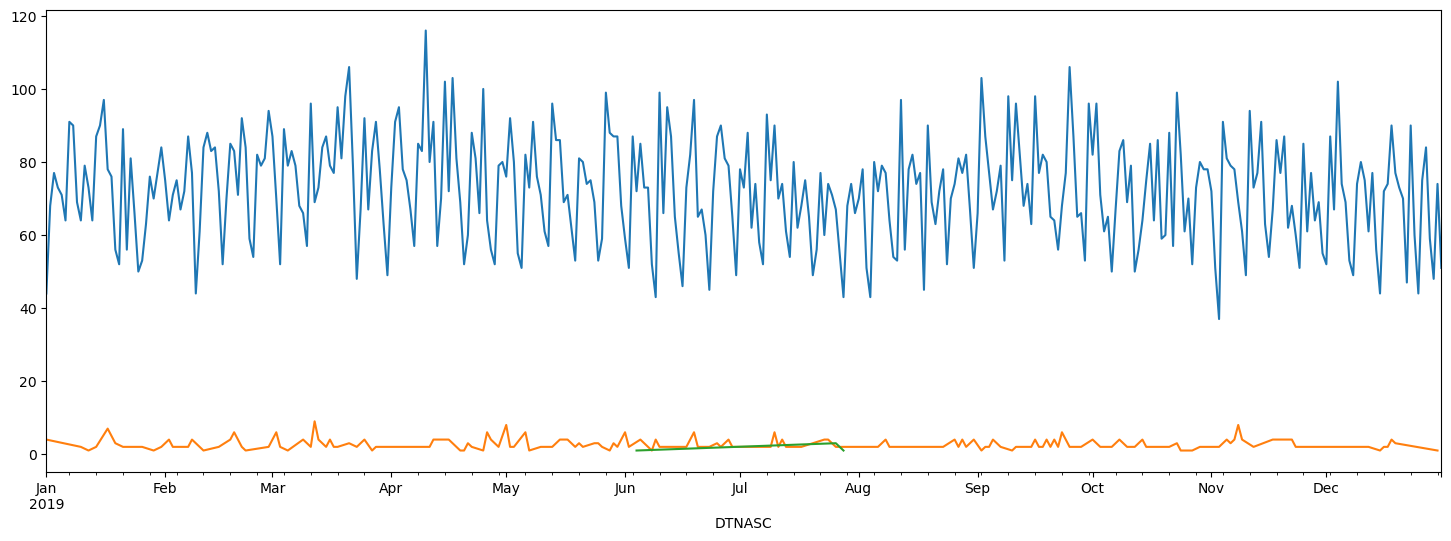

In [23]:
gravidez_unica = sinasc_raw.loc[sinasc_raw['GRAVIDEZ'] == 'Única'].groupby('DTNASC')['IDADEMAE'].count()
gravidez_dupla = sinasc_raw.loc[sinasc_raw['GRAVIDEZ'] == 'Dupla'].groupby('DTNASC')['IDADEMAE'].count()
gravidez_triplice = sinasc_raw.loc[sinasc_raw['GRAVIDEZ'] == 'Tríplice e mais'].groupby('DTNASC')['IDADEMAE'].count()

gravidez_unica.plot(figsize=[18,6])
gravidez_dupla.plot()
gravidez_triplice.plot()

In [24]:
gravidez_unica

DTNASC
2019-01-01    44
2019-01-02    68
2019-01-03    77
2019-01-04    73
2019-01-05    71
              ..
2019-12-27    84
2019-12-28    59
2019-12-29    48
2019-12-30    74
2019-12-31    51
Name: IDADEMAE, Length: 365, dtype: int64

In [25]:
gravidez_dupla

DTNASC
2019-01-01    4
2019-01-10    2
2019-01-12    1
2019-01-14    2
2019-01-17    7
             ..
2019-12-16    2
2019-12-17    2
2019-12-18    4
2019-12-19    3
2019-12-30    1
Name: IDADEMAE, Length: 184, dtype: int64

In [26]:
gravidez_triplice

DTNASC
2019-06-04    1
2019-07-26    3
2019-07-28    1
Name: IDADEMAE, dtype: int64

In [28]:
peso_castanheiras = sinasc_raw.loc[sinasc_raw['munResNome'] == 'Castanheiras'].groupby('IDADEMAE')['PESO'].agg('mean')
peso_porto_velho = sinasc_raw.loc[sinasc_raw['munResNome'] == 'Porto Velho'].groupby('IDADEMAE')['PESO'].agg('mean')

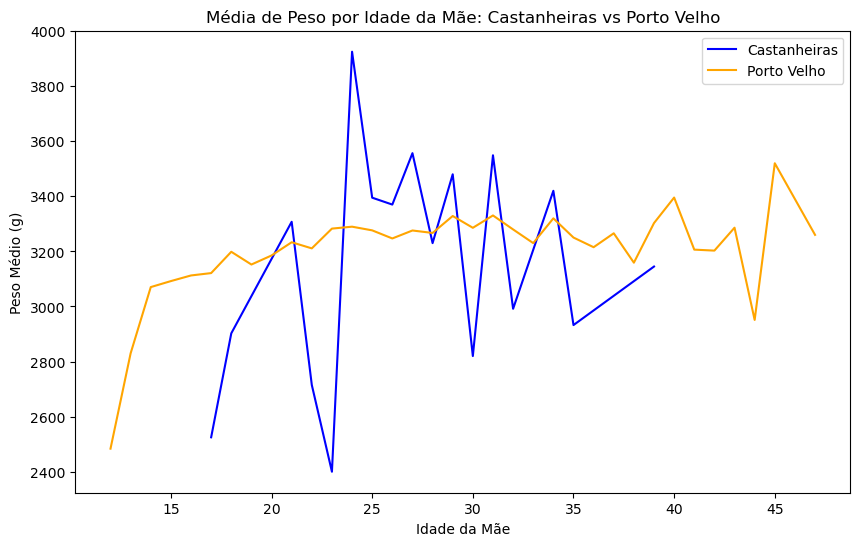

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(peso_castanheiras.index, peso_castanheiras.values, label='Castanheiras', color='blue')
plt.plot(peso_porto_velho.index, peso_porto_velho.values, label='Porto Velho', color='orange')

plt.title('Média de Peso por Idade da Mãe: Castanheiras vs Porto Velho')

plt.xlabel('Idade da Mãe')
plt.ylabel('Peso Médio (g)')

plt.legend()

plt.show()

## Insights gerados pela observação da plotagem diferentes gráficos fazendo análise de diferentes dados

A partir da análise entre o peso do bebê, o tipo de parto e o tempo de gestação, assim como na comparação entre tipo de parto, tempo de gestação e APGAR5, fica claro que a cesárea oferece mais segurança para o bebê. Em todas as faixas de tempo, a nota de APGAR5 para cesáreas não fica abaixo de 7. A cesárea é especialmente recomendada para casos mais delicados. Isso é evidente em gestações com menos de 22 semanas, onde o parto vaginal tende a ter notas de APGAR5 muito baixas e o peso médio do bebê fica abaixo de 1500g, enquanto a cesárea, mesmo nesses casos, mantém boas notas no APGAR5.

Os índices de gravidez única e dupla nunca se cruzam, pois há uma diferença significativa na quantidade entre os dois. Já entre gravidez dupla e tripla (ou mais), isso não acontece: apesar de serem em número bem menor, as gestações triplas ou mais acabam se sobrepondo aos baixos índices das gestações duplas.

Ao analisar a relação entre o peso e a idade das mães nas cidades de Porto Velho, com o maior número de nascimentos, e Castanheiras, com o menor número, surgem algumas percepções interessantes. A primeira delas é a constância no peso dos recém-nascidos em Porto Velho ao longo das diferentes faixas etárias. A partir dos 15 anos o peso dos bebês se mantém consistentemente acima de 3000g. Por outro lado, o gráfico de Castanheiras é marcado por picos e quedas. Entre as idades de 20 e 25 anos, há uma queda no peso, seguida de um pico aos 25 anos, para logo retornar a uma nova redução. Esse padrão irregular sugere que, enquanto Porto Velho, por ser a capital de Rondônia, possui mais recursos e infraestrutura para oferecer os cuidados necessários durante a gestação, como acompanhamento médico e alimentação adequada, em Castanheiras, as variações são mais pronunciadas, possivelmente devido à disparidade nas condições individuais das mães e ao acesso limitado a serviços e cuidados de saúde.